In [1]:
import sys
sys.path.append("../standard-algorithms")

from julia import install as julia_install
from julia.api import Julia

julia_install()
# ubuntu/debian/conda static linkage to libpython workaround
# set to True if you have a different python distribution
# otherwise it significantly bloats the initial loading time.
jl = Julia(compiled_modules=False)
from julia import Main
import numpy as np
import importlib

In [2]:
Main.include("./test_bluemesh7.jl")

<PyCall.jlwrap Main.BlueMesh7>

In [3]:
jl.using(".BlueMesh7")
BlueMesh7 = Main.BlueMesh7

In [4]:
import greedy_algorithms
greedy_algorithms = importlib.reload(greedy_algorithms)
greedy_connect_without_prune = greedy_algorithms.greedy_connect_without_prune
greedy_connect = greedy_algorithms.greedy_connect
show_graph_with_labels = greedy_algorithms.show_graph_with_labels

In [5]:
import dominator_algorithm
dominator_algorithm = importlib.reload(dominator_algorithm)
dominator = dominator_algorithm.dominator

In [6]:
positions, adjacency = BlueMesh7.generate_graph()

### Set all agents in relay mode

Selected 64 relays out of 64 (100.0%)
running the simulation for 1 minute (60000 steps, 1 step = 1ms)...
packets produced: 565, received: 450, 79.65%


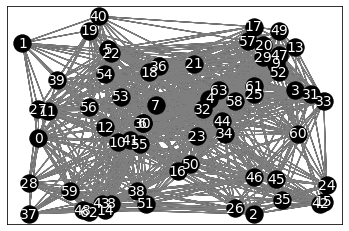

In [7]:
all_node_roles = np.ones(len(positions), dtype='i8')
all_mesh = BlueMesh7.initialize_mesh(positions, all_node_roles)

num_relays = len(positions)
print(f"Selected {num_relays} relays out of {len(positions)} ({100 * num_relays / len(positions)}%)")

show_graph_with_labels(adjacency, all_node_roles, positions)


print("running the simulation for 1 minute (60000 steps, 1 step = 1ms)...")
produced, received = BlueMesh7.start(all_mesh, minutes = 1)
print(f"packets produced: {produced}, received: {received}, {round(100 * received / produced, 2)}%")

### GreedyConnect

Selected 4 relays out of 64 (6.25%)
running the simulation for 1 minute (60000 steps, 1 step = 1ms)...
packets produced: 645, received: 229, 35.5%


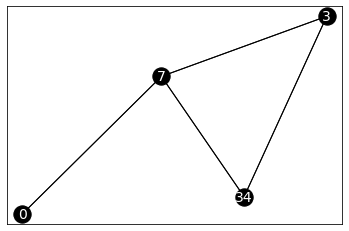

In [8]:
greedy_node_roles = greedy_connect(adjacency)
greedy_mesh = BlueMesh7.initialize_mesh(positions, greedy_node_roles)

num_relays = np.count_nonzero(greedy_node_roles)
print(f"Selected {num_relays} relays out of {len(positions)} ({100 * num_relays / len(positions)}%)")

show_graph_with_labels(adjacency, greedy_node_roles, positions, only_relays=True)


print("running the simulation for 1 minute (60000 steps, 1 step = 1ms)...")
produced, received = BlueMesh7.start(greedy_mesh, minutes = 1)
print(f"packets produced: {produced}, received: {received}, {round(100 * received / produced, 2)}%")

### Dominator

Selected 23 relays out of 64 (35.9375%)
running the simulation for 1 minute (60000 steps, 1 step = 1ms)...
packets produced: 587, received: 493, 83.99%


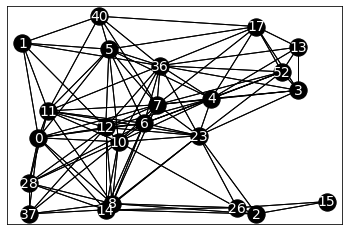

In [9]:
dominator_node_roles = dominator(adjacency)
dominator_mesh = BlueMesh7.initialize_mesh(positions, dominator_node_roles)

num_relays1 = np.count_nonzero(dominator_node_roles)
print(f"Selected {num_relays1} relays out of {len(positions)} ({100 * num_relays1 / len(positions)}%)")

show_graph_with_labels(adjacency, dominator_node_roles, positions, only_relays=True)

print("running the simulation for 1 minute (60000 steps, 1 step = 1ms)...")
produced, received = BlueMesh7.start(dominator_mesh, minutes = 1)
print(f"packets produced: {produced}, received: {received}, {round(100 * received / produced, 2)}%")